In [8]:
from os import chdir, listdir
from warnings import simplefilter
from xarray import DataArray, open_dataset
simplefilter("ignore")

In [9]:
chdir('/home/zhangc/WPS/output_metgrid/cmip6/')

In [10]:
ls

met_em.d01.2001-01-01_00:00:00.nc  met_em.d01.2001-01-01_18:00:00.nc
met_em.d01.2001-01-01_06:00:00.nc  met_em.d01.2001-01-02_00:00:00.nc
met_em.d01.2001-01-01_12:00:00.nc


In [11]:
nc = 'met_em.d01.2001-01-01_00:00:00.nc'

In [12]:
ds = open_dataset(nc)

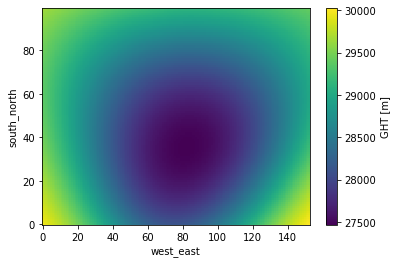

In [22]:
ds.GHT[0][-1].plot()